# Cena do Rap

## Perguntas

- qual o artista mais popular nas playlists brasileiras?
- existe algo que correlacione com popularidade para o rap?
- quais são as características mais comuns para as músicas mais populares?

In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [3]:
plt.style.use('seaborn-deep')

In [10]:
base_folder = 'data'
last_execution = '2022-06-12'

df = pd.read_csv(f'../{base_folder}/df_processed_{last_execution}.csv')
df_brazil = pd.read_csv(f'../{base_folder}/df_brazil_{last_execution}.csv')

In [11]:
df.head()

,added_at,album_name,track_number,artists,name,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,playlist_name,playlist_description
0,2022-06-10T03:01:00Z,Fica Até Umas Hora,1,['Black Alien'],Fica Até Umas Hora,45,0.788,0.591,11,-7.744,...,0.622,0.000053,0.3620,0.712,74.884,audio_features,228800,4,AULAS,black alien é AULAS
1,2022-06-10T03:01:00Z,The Cypher Deffect 3,1,"['Costa Gold', 'Tz da Coronel', 'Major RD', 'A...",The Cypher Deffect 3,62,0.574,0.660,1,-6.694,...,0.299,0.000000,0.1140,0.667,82.330,audio_features,276882,4,AULAS,black alien é AULAS
2,2022-06-10T03:01:00Z,Deus É o Meu Guia,1,"['Chefin', 'Mainstreet']",Deus É o Meu Guia,72,0.881,0.373,1,-8.908,...,0.215,0.000000,0.0770,0.909,114.974,audio_features,166957,4,AULAS,black alien é AULAS
3,2022-06-10T03:01:00Z,Coisas Que Eu Só Falaria Brincando,7,"['Sid', 'NOG', 'André Nine', 'Chiocki']",Sitio do Tio Harry,65,0.682,0.694,1,-6.353,...,0.448,0.000000,0.2980,0.732,84.306,audio_features,291882,4,AULAS,black alien é AULAS
4,2022-06-10T03:01:00Z,Sigo na Fé do Pai,1,"['Salvador Da Rima', 'Mc Poze do Rodo', 'MC Ry...",Sigo na Fé do Pai,66,0.499,0.762,6,-4.163,...,0.141,0.000000,0.0988,0.622,173.262,audio_features,264828,4,AULAS,black alien é AULAS


In [12]:
df.shape

(975, 22)

## Fields description

### popularity, integer

The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.

### duration_ms, integer

The track length in milliseconds.

### acousticness, number\<float\>

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1
       
### danceability, number\<float\>

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
### energy, number\<float\>

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
### instrumentalness, number\<float\>

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
     
### key, integer

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1 <= 11
                 
### liveness, number\<float\>

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

### loudness, number\<float\>

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
    
### mode, integer

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
### speechiness, number\<float\>

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
### tempo, number\<float\>

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
### time_signature, integer

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7
            
### valence, number\<float\>

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

### valence, number\<float\>

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1.

In [13]:
df.columns

Index(['added_at', 'album_name', 'track_number', 'artists', 'name',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'playlist_name', 'playlist_description'],
      dtype='object')

In [14]:
df.playlist_name.value_counts()

I Love My '90s Hip-Hop              99
Rap Acústico                        67
DOPE.                               65
Gigantes do Rap Nacional            65
Flow Romance                        63
No Princípio Era o Verso            56
Resenha na Praia                    55
TRAPando                            54
Presença Hip Hop                    53
AULAS                               50
Rap Geek                            49
RapCaviar                           46
Trap Classe                         45
Trapperz Brasil                     44
O Melhor da Trapperz Brasil 2021    39
Trap Ouro                           35
creme                               25
Copão na mão                        24
AMPLIFIKA                           23
O Drip                              18
Name: playlist_name, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   added_at              975 non-null    object 
 1   album_name            975 non-null    object 
 2   track_number          975 non-null    int64  
 3   artists               975 non-null    object 
 4   name                  975 non-null    object 
 5   popularity            975 non-null    int64  
 6   danceability          975 non-null    float64
 7   energy                975 non-null    float64
 8   key                   975 non-null    int64  
 9   loudness              975 non-null    float64
 10  mode                  975 non-null    int64  
 11  speechiness           975 non-null    float64
 12  acousticness          975 non-null    float64
 13  instrumentalness      975 non-null    float64
 14  liveness              975 non-null    float64
 15  valence               9

In [16]:
df.describe()

,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,2.748718,49.008205,0.722228,0.592259,5.506667,-7.537078,0.389744,0.205246,0.297940,0.002114,0.178189,0.557432,115.492892,224995.348718,3.992821
std,3.355010,20.841041,0.119251,0.143652,3.517003,2.617783,0.487942,0.135303,0.238048,0.023432,0.150569,0.209140,28.251914,82347.203960,0.346513
min,1.000000,0.000000,0.317000,0.141000,0.000000,-16.789000,0.000000,0.028500,0.000017,0.000000,0.030800,0.059000,51.612000,96625.000000,1.000000
25%,1.000000,37.000000,0.642000,0.494000,2.000000,-9.079000,0.000000,0.082000,0.095500,0.000000,0.095300,0.400000,91.842500,170000.000000,4.000000
50%,1.000000,52.000000,0.735000,0.595000,6.000000,-7.188000,0.000000,0.192000,0.239000,0.000000,0.119000,0.564000,114.878000,207315.000000,4.000000
75%,3.000000,64.000000,0.807000,0.686500,8.000000,-5.725000,1.000000,0.301000,0.463000,0.000001,0.199000,0.721500,133.786500,256874.500000,4.000000
max,24.000000,94.000000,0.963000,0.949000,11.000000,1.906000,1.000000,0.809000,0.956000,0.580000,0.976000,0.974000,206.247000,682817.000000,5.000000


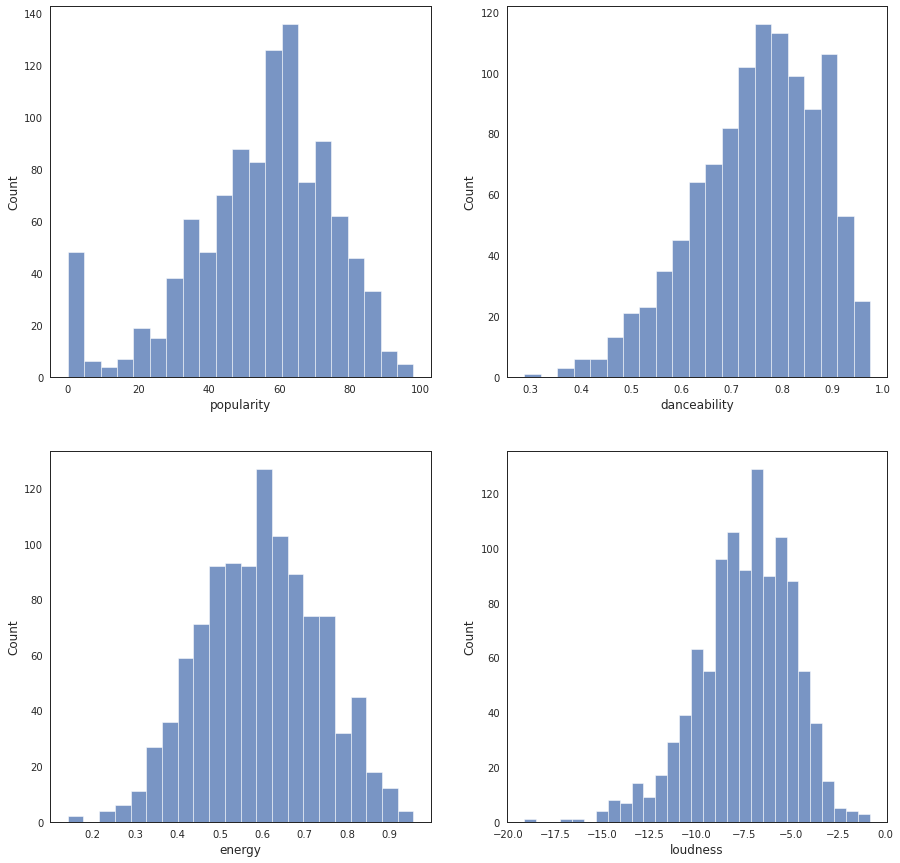

In [18]:
analysis_cols = [
    'popularity', 
    'danceability', 
    'energy', 
    'loudness', 
    'speechiness', 
    'acousticness', 
    'instrumentalness', 
    'liveness', 
    'valence', 
    'tempo', 
    'duration_ms'
]
fig, axs = plt.subplots(2, 2, figsize=(15,15))

def plot_hist_in_ax(axs, col_name):
    sns.histplot(data=df[col_name], ax=axs)

cnt = 0
for i in range(2):
    for j in range(2):
        plot_hist_in_ax(axs[i][j], analysis_cols[cnt])
        cnt += 1

4
5


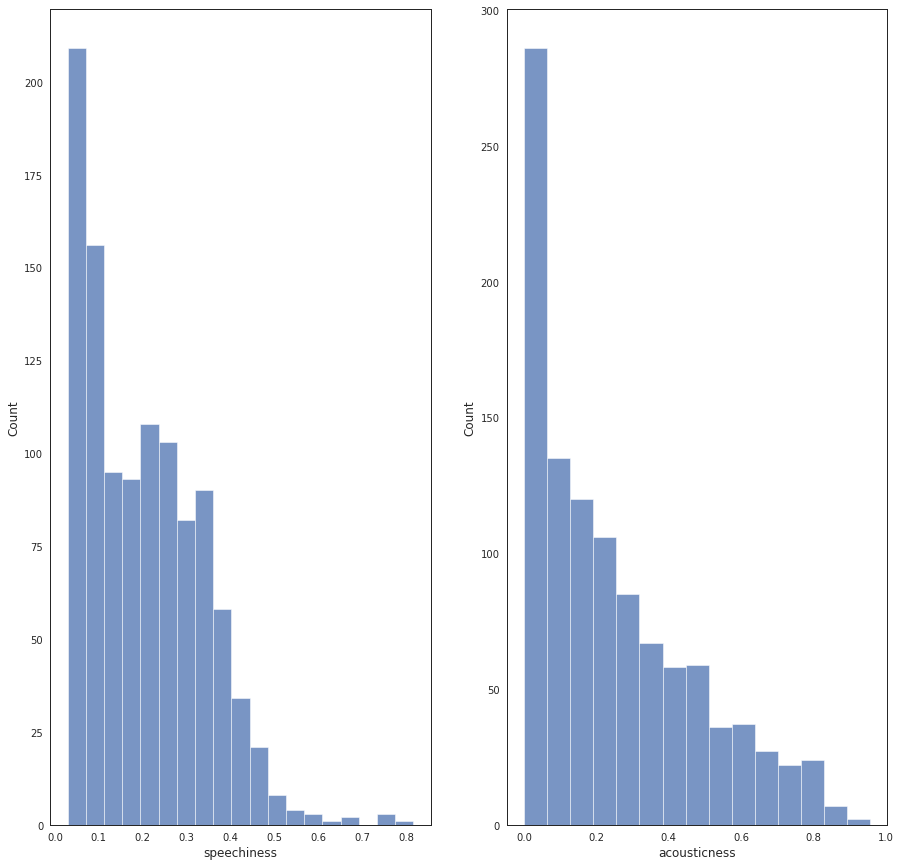

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))

cnt = 4
for i in range(2):
#     for j in range(2):
    print(cnt)
    plot_hist_in_ax(axs[i], analysis_cols[cnt])
    cnt += 1

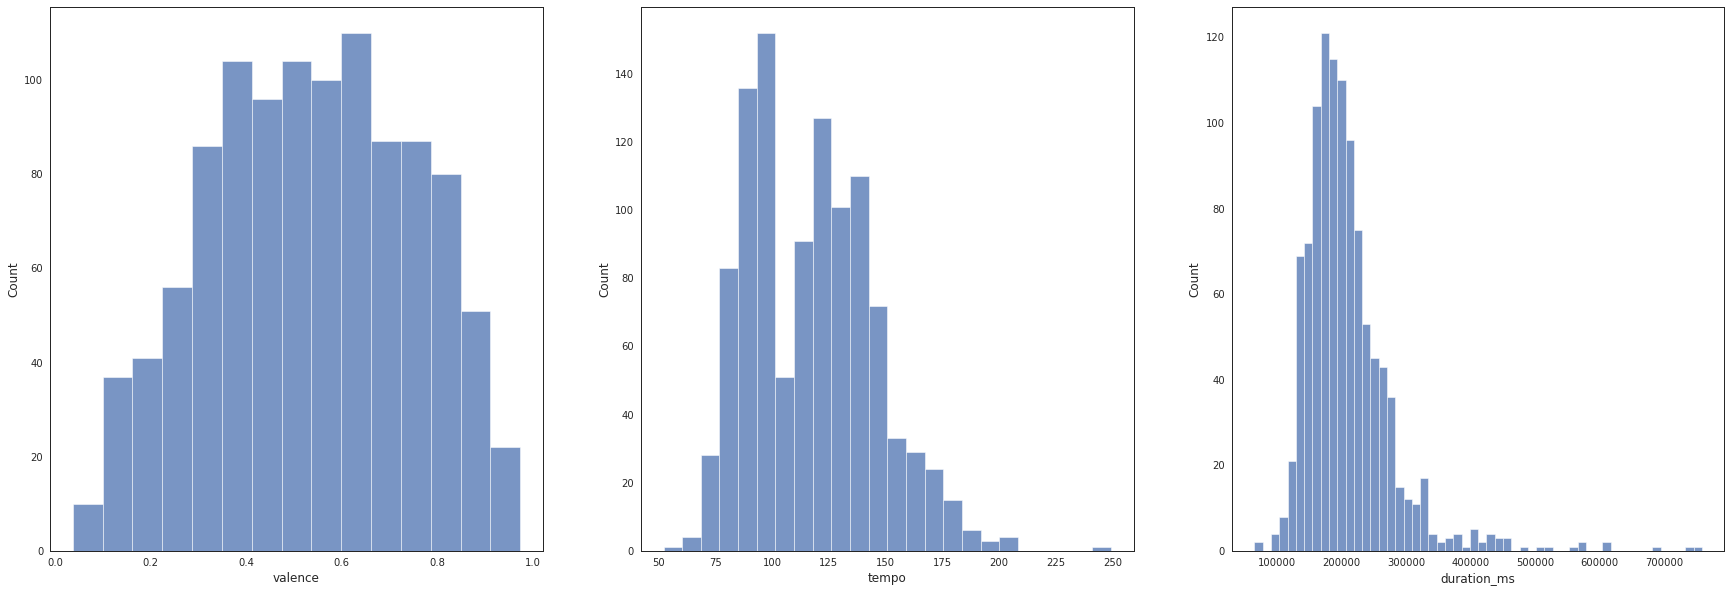

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))

cnt = 8
for i in range(3):
    plot_hist_in_ax(axs[i], analysis_cols[cnt])
    cnt += 1

In [21]:
normalized_df=(df-df.mean())/df.std()

/tmp/ipykernel_31407/209819120.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df-df.mean())/df.std()


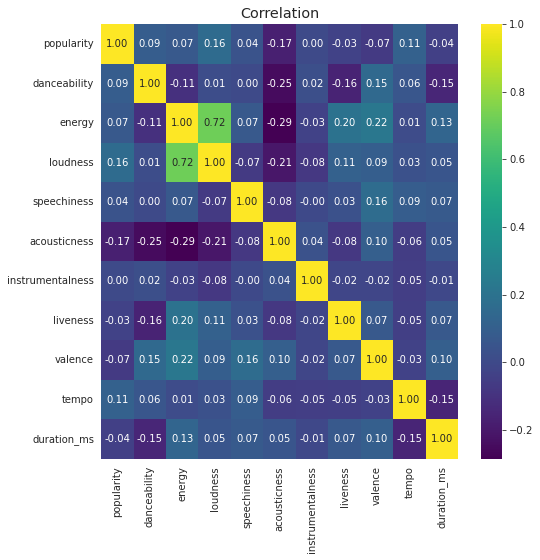

In [22]:
plt.figure(figsize=(8, 8))
plt.title("Correlation")
sns.heatmap(df[analysis_cols].corr(), annot=True, fmt='.2f', cmap='viridis');

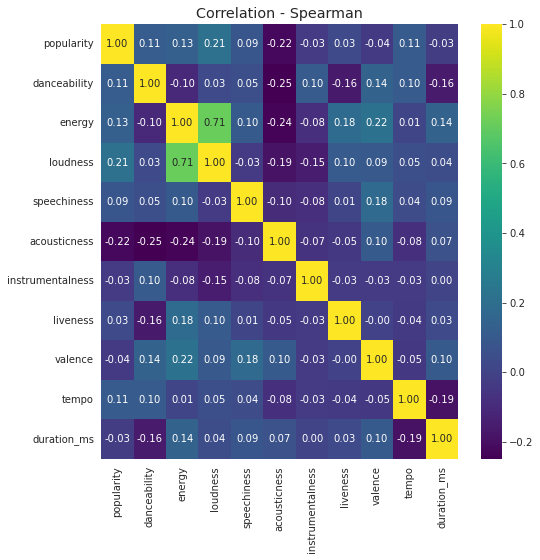

In [23]:
plt.figure(figsize=(8, 8))
plt.title("Correlation - Spearman")
sns.heatmap(df[analysis_cols].corr('spearman'), annot=True, fmt='.2f', cmap='viridis');

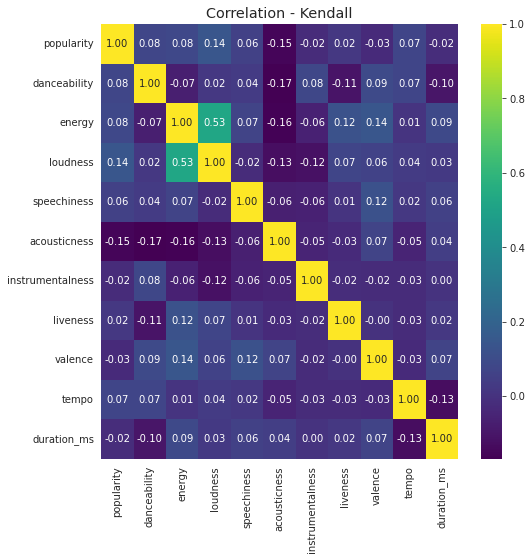

In [24]:
plt.figure(figsize=(8, 8))
plt.title("Correlation - Kendall")
sns.heatmap(df[analysis_cols].corr('kendall'), annot=True, fmt='.2f', cmap='viridis');

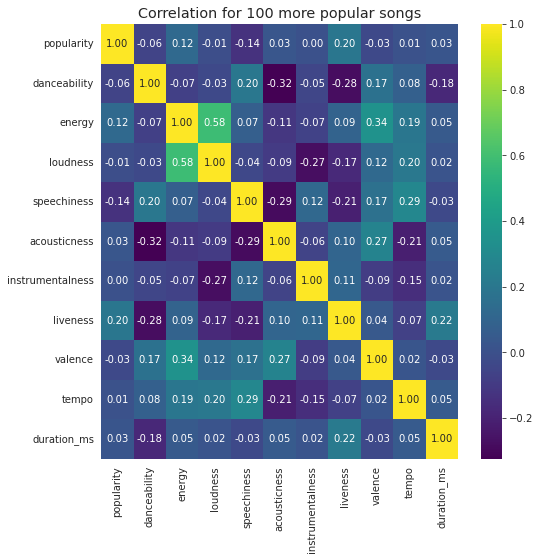

In [25]:
df_sorted = df.sort_values('popularity', ascending=False).nlargest(100, 'popularity').drop_duplicates(['name']) # 100 more popular songs

plt.figure(figsize=(8, 8))
plt.title("Correlation for 100 more popular songs")
sns.heatmap(df_sorted[analysis_cols].corr(), annot=True, fmt='.2f', cmap='viridis');

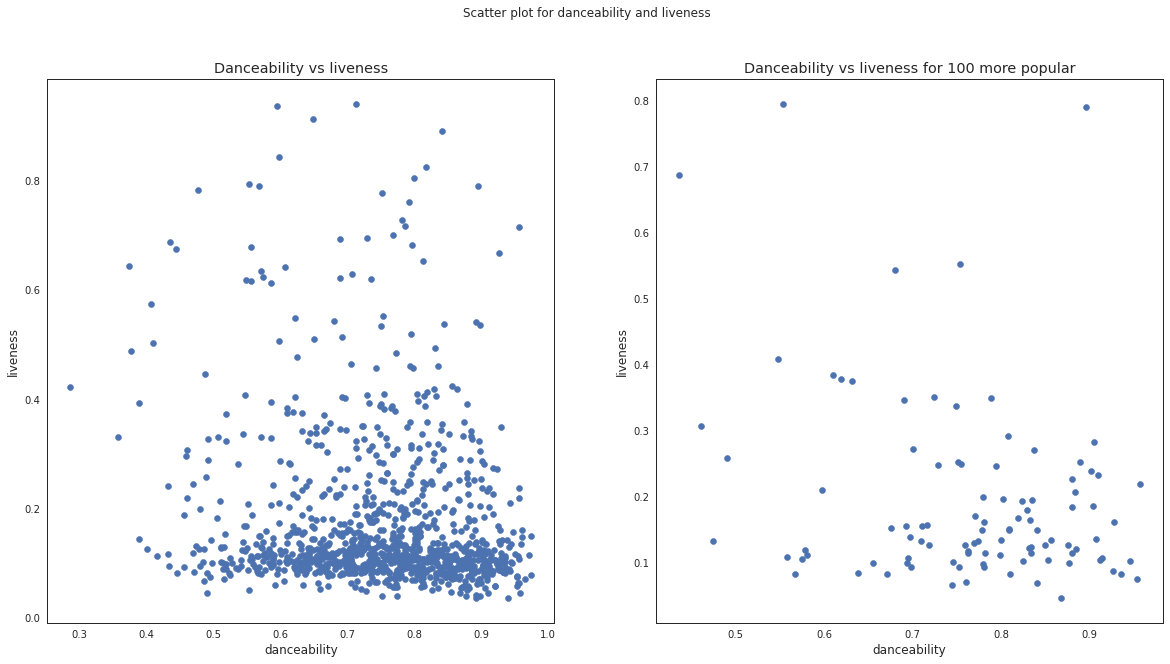

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Scatter plot for danceability and liveness')
ax1.scatter(df.danceability, df.liveness)
ax1.set_title('Danceability vs liveness')
ax1.set_xlabel('danceability')
ax1.set_ylabel('liveness')
ax2.scatter(df_sorted.danceability, df_sorted.liveness)
ax2.set_title('Danceability vs liveness for 100 more popular')
ax2.set_xlabel('danceability')
ax2.set_ylabel('liveness');

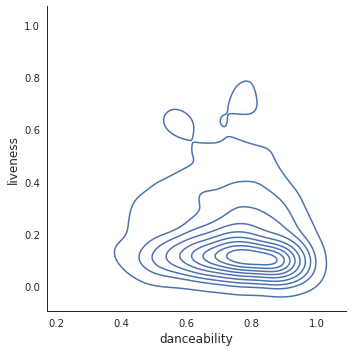

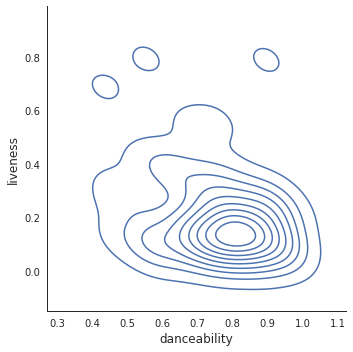

In [27]:
sns.displot(data=df, x="danceability", y="liveness", kind="kde")
sns.displot(data=df_sorted, x="danceability", y="liveness", kind="kde");

In [28]:
gb_playlist = df.groupby('playlist_name', as_index=False).mean().sort_values('popularity', ascending=False) # Ranking for most popular playlists
gb_playlist

,playlist_name,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,DOPE.,3.250000,82.616667,0.754550,0.593000,4.550000,-6.617317,0.583333,0.171442,0.156533,0.001131,0.192207,0.460080,125.966233,186981.950000,3.983333
13,RapCaviar,2.880952,78.571429,0.783310,0.594881,4.357143,-6.809429,0.523810,0.243038,0.150444,0.014261,0.152807,0.503095,125.509952,182707.666667,3.952381
0,Beast Mode Hip-Hop,4.192308,72.230769,0.798981,0.661000,5.250000,-5.965423,0.634615,0.227515,0.107008,0.002039,0.199604,0.526371,125.589077,184860.384615,4.000000
12,Rap Workout,2.947368,66.736842,0.746474,0.621316,4.921053,-6.616816,0.552632,0.207826,0.163526,0.000270,0.206850,0.489547,123.287763,188279.921053,3.947368
18,Trapperz Brasil,1.425532,64.000000,0.790255,0.580681,5.106383,-7.185511,0.425532,0.200872,0.245143,0.000118,0.142234,0.500645,117.930404,203625.085106,3.957447
3,Feelin' Myself,2.666667,63.666667,0.850310,0.616167,4.857143,-6.837643,0.666667,0.264060,0.134878,0.000038,0.187824,0.572452,122.600333,164034.976190,4.000000
10,RAPública,1.683333,62.266667,0.711567,0.625583,5.600000,-7.000500,0.366667,0.218765,0.312940,0.000333,0.128270,0.582300,118.479600,228877.316667,3.983333
7,Hip Hop Crew,2.500000,58.068182,0.760955,0.603432,6.295455,-6.926045,0.431818,0.164536,0.145731,0.000170,0.147998,0.438773,120.679636,175624.113636,4.000000
6,Hip Hop Controller,1.797297,56.054054,0.771730,0.627135,5.972973,-6.510176,0.445946,0.203632,0.159542,0.000086,0.173134,0.487382,122.934378,180915.270270,3.986486
11,Rap Acústico,1.183333,52.183333,0.659350,0.537200,5.350000,-8.510500,0.216667,0.144332,0.469090,0.000027,0.164625,0.594100,113.081767,251373.583333,4.000000


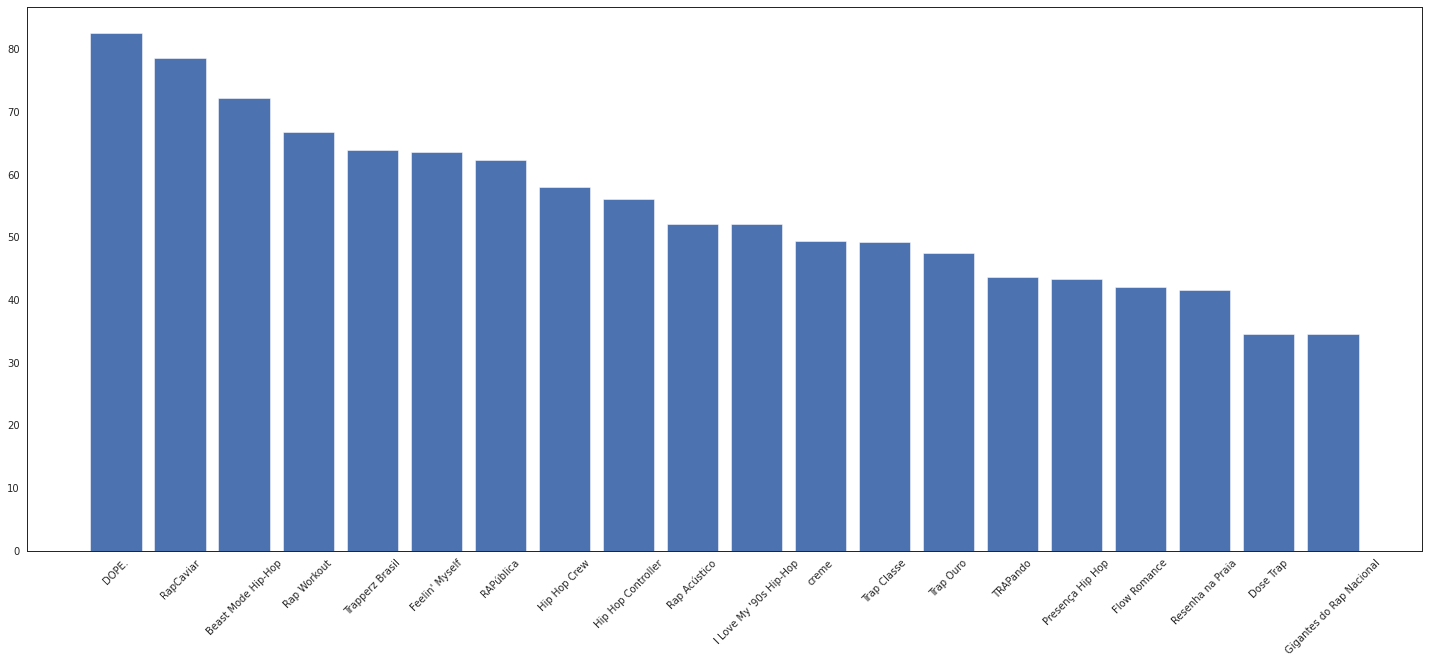

In [29]:
plt.figure(figsize=(25,10))
plt.xticks(range(len(gb_playlist.playlist_name)), gb_playlist.playlist_name, rotation=45)
plt.bar(gb_playlist.playlist_name, height=gb_playlist.popularity);

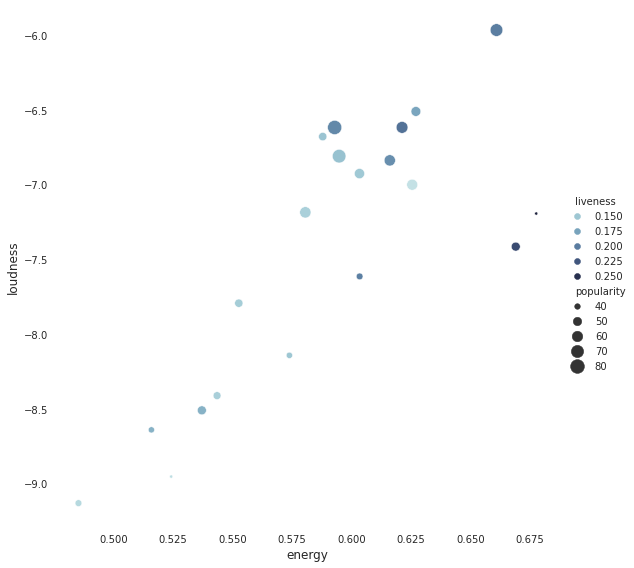

In [30]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=gb_playlist,
    x="energy", y="loudness",
    hue="liveness", size="popularity",
    palette=cmap, sizes=(10, 200),
    height=8, aspect=1
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

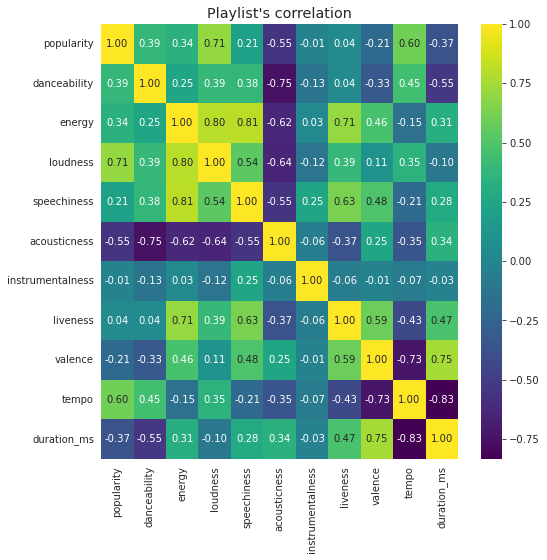

In [31]:
plt.figure(figsize=(8, 8))
plt.title("Playlist's correlation")
sns.heatmap(gb_playlist[analysis_cols].corr(), annot=True, fmt='.2f', cmap='viridis');

/home/tuts/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tuts/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


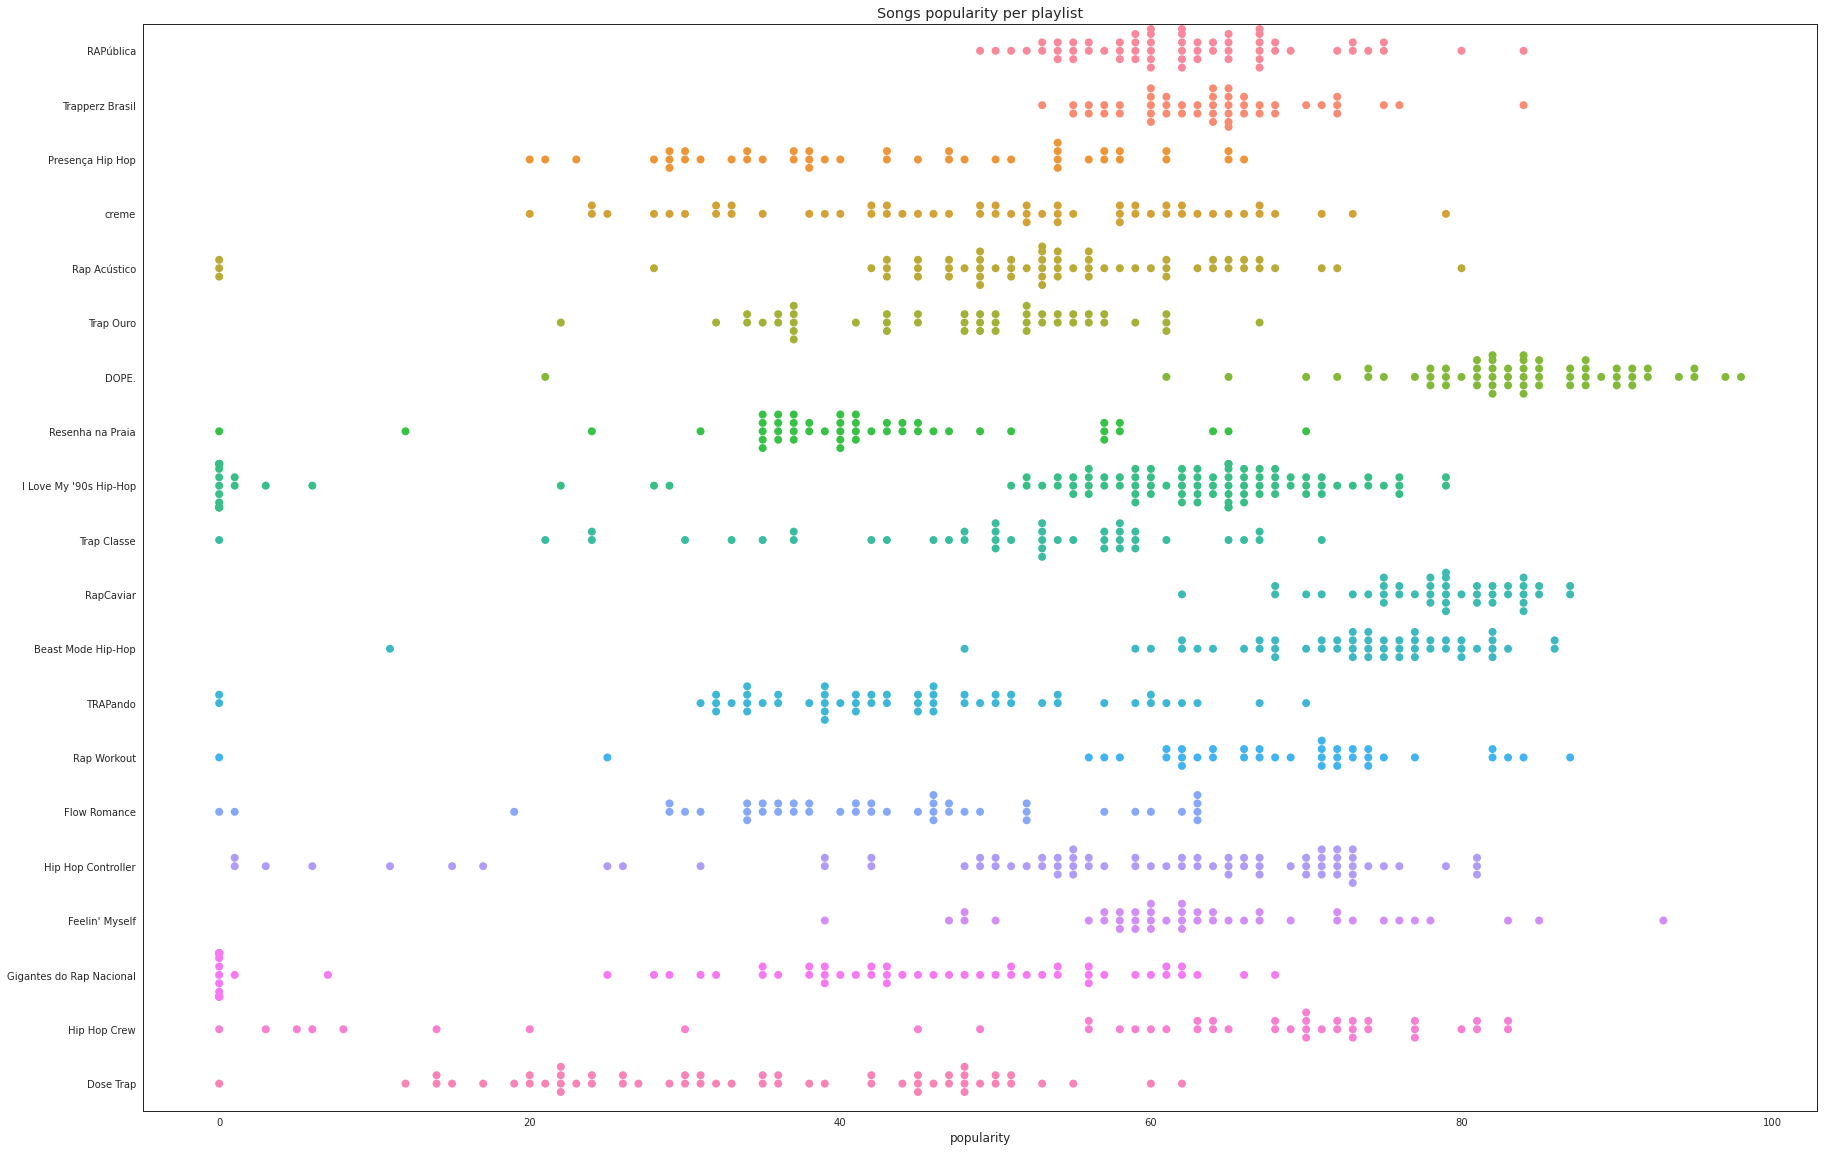

In [32]:
plt.figure(figsize=(30, 20))
ax = sns.swarmplot(data=df, x="popularity", y="playlist_name", size=8)
ax.set(ylabel="")
plt.title("Songs popularity per playlist");

In [33]:
most_popular_songs = df_without_duplicates.sort_values('popularity', ascending=False).nlargest(10, 'popularity') # most popular songs, not actually 30 because of duplicates

def plot_bars(data, figsize=(12,10), title='Bar plot'):
    plt.figure(figsize=figsize)
    plt.xticks(range(len(data.name)), data.name, rotation=45)
    plt.bar(data.name, height=data.popularity)
    plt.title(title);
    
plot_bars(most_popular_songs, figsize=(20,10), title='Top most popular songs')

NameError: name 'df_without_duplicates' is not defined

In [34]:
least_popular_songs = df.nsmallest(10, 'popularity')
plot_bars(least_popular_songs, figsize=(20,10), title='Least popular songs')

NameError: name 'plot_bars' is not defined

In [35]:
least_popular_above_0  = df_without_duplicates[(df_without_duplicates.popularity > 0) & (df_without_duplicates.popularity < 10)].sort_values('popularity', ascending=False)
plot_bars(least_popular_above_0, figsize=(20, 10), title='Least popular songs with more than 0 popularity')

NameError: name 'df_without_duplicates' is not defined

In [88]:
artists_on_top_pop = most_popular_songs.artists.apply(artists_to_list)
artists_on_top_pop

428              [The Weeknd]
412             [Masked Wolf]
436       [kGoldn, iann dior]
414          [Lil Tjay, LACK]
419                [Doja Cat]
1108                    [SZA]
411                   [Drake]
421                 [Cardi B]
449     [DaBaby, Roddy Ricch]
446               [Pop Smoke]
Name: artists, dtype: object